In [166]:
pip install keras tensorflow scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [168]:
df = pd.read_csv('/home/ariyaman/learntocode/Stockipy/data/historical_stock_data_HDFCBANK.csv')

In [169]:
df

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-26,EQ,1707.95,1710.90,1691.10,1711.35,1693.50,1701.50,1703.01,1757.5,1363.55,23798333,4.052887e+10,424591,HDFCBANK
1,2024-06-25,EQ,1671.10,1716.95,1671.10,1672.40,1707.00,1711.35,1705.04,1757.5,1363.55,37260774,6.353113e+10,690683,HDFCBANK
2,2024-06-24,EQ,1647.00,1675.10,1645.75,1665.75,1671.00,1672.40,1664.93,1757.5,1363.55,14272497,2.376264e+10,387580,HDFCBANK
3,2024-06-21,EQ,1672.85,1672.85,1643.15,1669.35,1661.65,1665.75,1658.68,1757.5,1363.55,25815388,4.281944e+10,408577,HDFCBANK
4,2024-06-20,EQ,1669.80,1681.45,1652.00,1657.85,1667.25,1669.35,1667.89,1757.5,1363.55,20704371,3.453260e+10,465827,HDFCBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,2013-01-07,EQ,683.70,683.70,666.00,679.35,668.00,668.20,671.03,705.5,446.00,2751142,1.846109e+09,59257,HDFCBANK
2852,2013-01-04,EQ,685.00,685.00,672.80,683.35,679.85,679.35,676.86,705.5,419.50,2721127,1.841809e+09,54481,HDFCBANK
2853,2013-01-03,EQ,690.00,690.00,680.40,687.35,682.45,683.35,684.70,705.5,419.50,2285683,1.565014e+09,57225,HDFCBANK
2854,2013-01-02,EQ,689.90,690.00,683.05,684.50,688.15,687.35,686.96,705.5,419.50,2427399,1.667532e+09,76666,HDFCBANK


In [170]:
df.info

<bound method DataFrame.info of             DATE SERIES     OPEN     HIGH      LOW  PREV. CLOSE      LTP  \
0     2024-06-26     EQ  1707.95  1710.90  1691.10      1711.35  1693.50   
1     2024-06-25     EQ  1671.10  1716.95  1671.10      1672.40  1707.00   
2     2024-06-24     EQ  1647.00  1675.10  1645.75      1665.75  1671.00   
3     2024-06-21     EQ  1672.85  1672.85  1643.15      1669.35  1661.65   
4     2024-06-20     EQ  1669.80  1681.45  1652.00      1657.85  1667.25   
...          ...    ...      ...      ...      ...          ...      ...   
2851  2013-01-07     EQ   683.70   683.70   666.00       679.35   668.00   
2852  2013-01-04     EQ   685.00   685.00   672.80       683.35   679.85   
2853  2013-01-03     EQ   690.00   690.00   680.40       687.35   682.45   
2854  2013-01-02     EQ   689.90   690.00   683.05       684.50   688.15   
2855  2013-01-01     EQ   682.10   685.10   679.65       678.60   683.60   

        CLOSE     VWAP   52W H    52W L    VOLUME      

In [171]:
df.drop(['VOLUME','VALUE','NO OF TRADES','LTP'], axis=1, inplace=True)


In [172]:
df.info

<bound method DataFrame.info of             DATE SERIES     OPEN     HIGH      LOW  PREV. CLOSE    CLOSE  \
0     2024-06-26     EQ  1707.95  1710.90  1691.10      1711.35  1701.50   
1     2024-06-25     EQ  1671.10  1716.95  1671.10      1672.40  1711.35   
2     2024-06-24     EQ  1647.00  1675.10  1645.75      1665.75  1672.40   
3     2024-06-21     EQ  1672.85  1672.85  1643.15      1669.35  1665.75   
4     2024-06-20     EQ  1669.80  1681.45  1652.00      1657.85  1669.35   
...          ...    ...      ...      ...      ...          ...      ...   
2851  2013-01-07     EQ   683.70   683.70   666.00       679.35   668.20   
2852  2013-01-04     EQ   685.00   685.00   672.80       683.35   679.35   
2853  2013-01-03     EQ   690.00   690.00   680.40       687.35   683.35   
2854  2013-01-02     EQ   689.90   690.00   683.05       684.50   687.35   
2855  2013-01-01     EQ   682.10   685.10   679.65       678.60   684.50   

         VWAP   52W H    52W L    SYMBOL  
0     1703.0

In [173]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values(by='DATE', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [174]:
df.head()


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,CLOSE,VWAP,52W H,52W L,SYMBOL
0,2013-01-01,EQ,682.1,685.1,679.65,678.60,684.50,682.68,705.5,419.5,HDFCBANK
1,2013-01-02,EQ,689.9,690.0,683.05,684.50,687.35,686.96,705.5,419.5,HDFCBANK
2,2013-01-03,EQ,690.0,690.0,680.40,687.35,683.35,684.70,705.5,419.5,HDFCBANK
3,2013-01-04,EQ,685.0,685.0,672.80,683.35,679.35,676.86,705.5,419.5,HDFCBANK
4,2013-01-07,EQ,683.7,683.7,666.00,679.35,668.20,671.03,705.5,446.0,HDFCBANK


In [177]:
df.duplicated().sum()


0

In [178]:
df.drop_duplicates(inplace=True)

In [179]:
df.isnull().sum().sum()


0

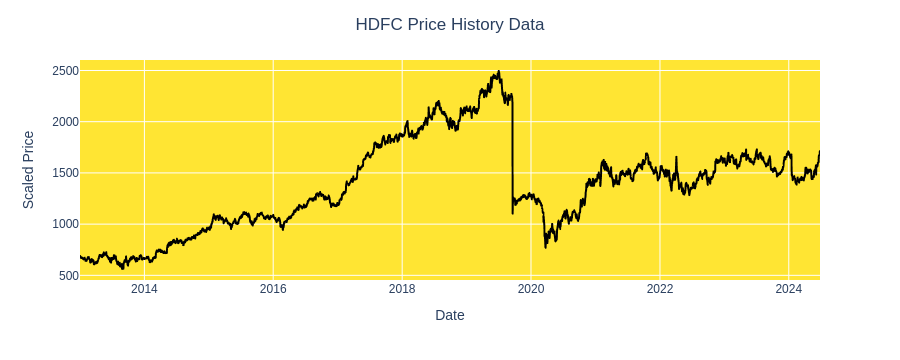

In [180]:
fig = px.line(y=df.CLOSE, x=df.DATE)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "HDFC Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [181]:
test_size = df[df.DATE.dt.year==2023].shape[0]
test_size

246

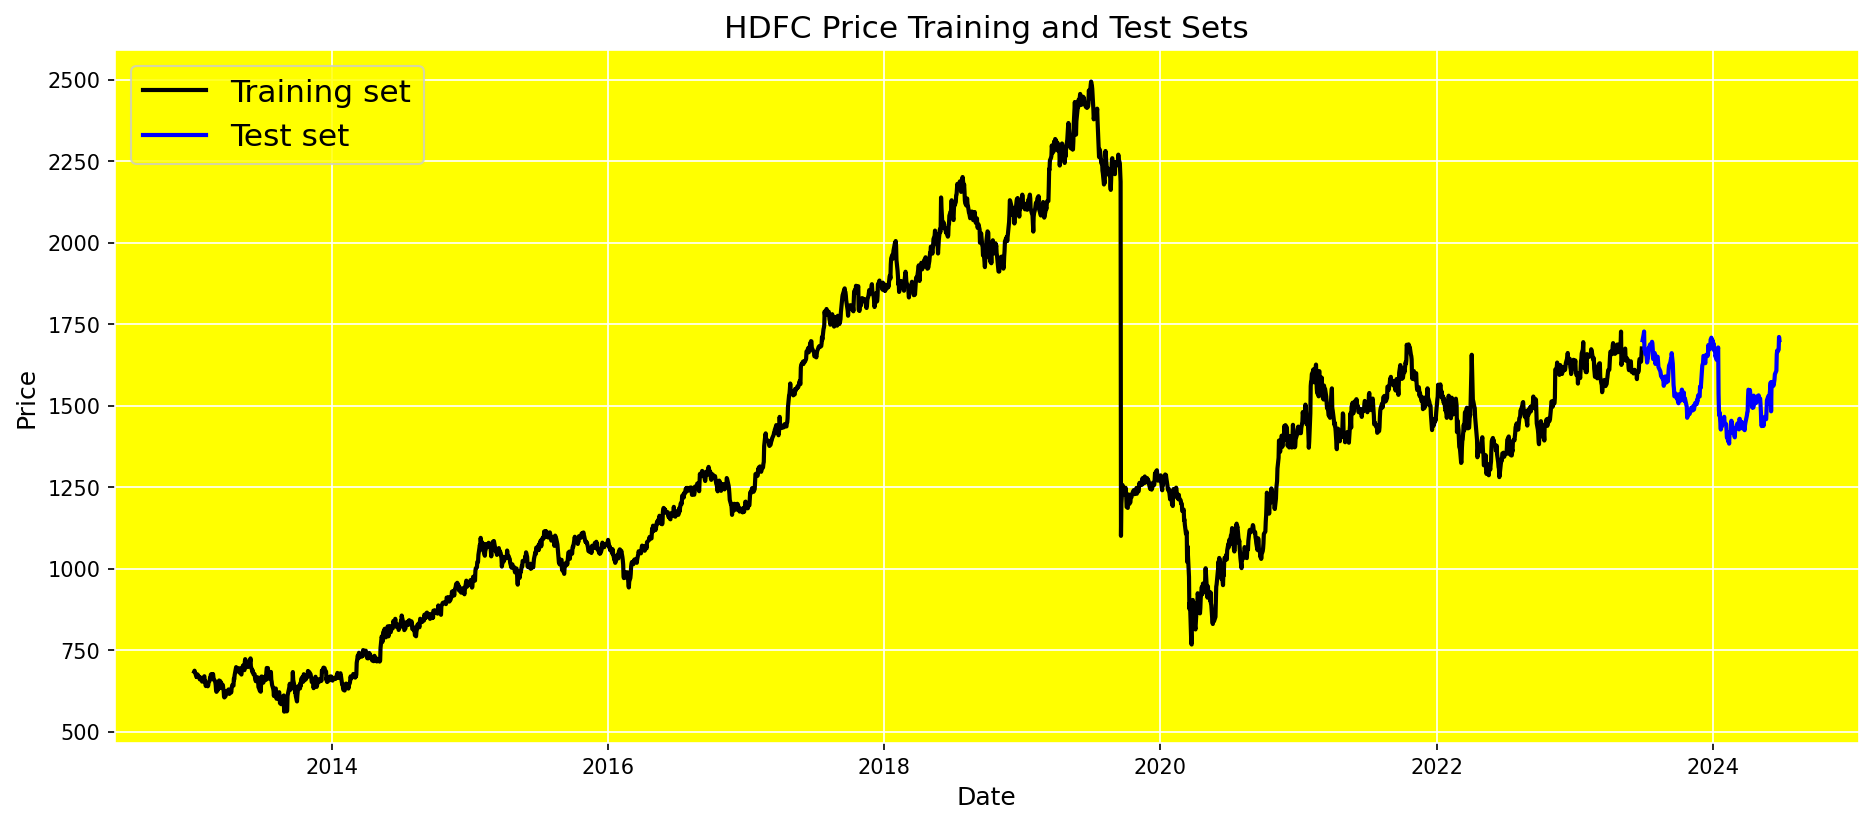

In [182]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df.DATE[:-test_size], df.CLOSE[:-test_size], color='black', lw=2)
plt.plot(df.DATE[-test_size:], df.CLOSE[-test_size:], color='blue', lw=2)
plt.title('HDFC Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [183]:
scaler = MinMaxScaler()
scaler.fit(df.CLOSE.values.reshape(-1,1))

MinMaxScaler()

In [184]:
window_size = 60

In [185]:
train_data = df.CLOSE[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [186]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [187]:
test_data = df.CLOSE[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [188]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [189]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [190]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [191]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (2535, 60, 1)
y_train Shape:  (2535, 1)
X_test Shape:   (246, 60, 1)
y_test Shape:   (246, 1)


In [192]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

In [193]:
model = define_model()
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0953 - val_loss: 0.0018
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0194 - val_loss: 0.0024
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0108 - val_loss: 5.5932e-04
Epoch 4/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0061 - val_loss: 0.0011
Epoch 5/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0045 - val_loss: 0.0022
Epoch 6/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0033 - val_loss: 6.9407e-04
Epoch 7/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0026 - val_loss: 4.8614e-04
Epoch 8/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0022 - val_loss: 8.9217e-04
Epoch 9/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0018 - val_loss: 9.6121e-04
Epoch 10/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0017 - val_loss: 3.3576e-04
Epoch 11/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0014 - val_loss: 6.9146e-04
Epoch 12/200
72/72 ━━━━━